In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

In [ ]:
# Load environment variables from .env file
load_dotenv()

MYSQL_USERNAME = os.getenv('MYSQL_USERNAME')
MYSQL_PASSWORD = os.getenv('MYSQL_PASSWORD')
MYSQL_HOST = os.getenv('MYSQL_HOST')
MYSQL_PORT = os.getenv('MYSQL_PORT')
MYSQL_DB = os.getenv('STAGING_DB')

# Construct the MySQL connection string
if MYSQL_PASSWORD:
    connection_string = f"mysql+pymysql://{MYSQL_USERNAME}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"
else:
    connection_string = f"mysql+pymysql://{MYSQL_USERNAME}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)
print('Connection to MySQL database established successfully.')



In [ ]:

# Extract the data from the database
query = "SELECT * FROM us_data_staging"  
us_data = pd.read_sql(query, con=engine)

# Close the connection
engine.dispose()

print("Data extraction completed successfully.")

In [72]:
us_data_copy = us_data.copy()

In [73]:
us_data_copy.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [74]:
us_data_copy.rename(columns={
    'X1':'current_assets',
    'X2':'cost_of_goods_sold',
    'X3':'depreciation_and_amortization',
    'X4':'ebitda',
    'X5':'inventory',
    'X6':'net_income',
    'X7':'total_receivables',
    'X8':'market_value',
    'X9':'net_sales',
    'X10':'total_assets',
    'X11':'total_long_term_debt',
    'X12':'ebit',
    'X13':'gross_profit',
    'X14':'total_current_liabilities',
    'X15':'retained_earnings',
    'X16':'total_revenue',
    'X17':'total_liabilities',
    'X18':'total_operating_expenses'}, inplace = True)


In [76]:
us_data_copy.head()

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,...,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [77]:
us_data_copy.isnull().sum().sort_values(ascending=False).head()

company_name         0
net_sales            0
total_liabilities    0
total_revenue        0
retained_earnings    0
dtype: int64

In [78]:
us_data_copy.columns = [i.title().strip() for i in list(us_data_copy.columns)]

rows = us_data_copy.shape[0]
cols = us_data_copy.shape[1]
print(f"The number of rows within the dataset are {rows} and the number of columns is {cols}")



The number of rows within the dataset are 78682 and the number of columns is 21


In [79]:
print(f"\nUS dataset data types count:\n\n{us_data_copy.dtypes.value_counts()}")


US dataset data types count:

float64    18
object      2
int64       1
Name: count, dtype: int64


In [80]:
numeric_features = us_data_copy.dtypes[us_data_copy.dtypes == 'float64'].index
categorical_features = us_data_copy.dtypes[us_data_copy.dtypes != 'float64'].index

us_data_copy[categorical_features].columns.tolist()

['Company_Name', 'Status_Label', 'Year']

In [81]:
print(numeric_features.tolist())

['Current_Assets', 'Cost_Of_Goods_Sold', 'Depreciation_And_Amortization', 'Ebitda', 'Inventory', 'Net_Income', 'Total_Receivables', 'Market_Value', 'Net_Sales', 'Total_Assets', 'Total_Long_Term_Debt', 'Ebit', 'Gross_Profit', 'Total_Current_Liabilities', 'Retained_Earnings', 'Total_Revenue', 'Total_Liabilities', 'Total_Operating_Expenses']


In [83]:
us_data_copy['Status_Label'].value_counts()

Status_Label
alive     73462
failed     5220
Name: count, dtype: int64

In [84]:
us_data_copy = us_data_copy.rename(columns={'Status_Label':'Bankrupt'})
us_data_copy['Bankrupt'] = us_data_copy['Bankrupt'].apply(lambda x : 0 if x == 'alive' else 1)


In [85]:
unique_bankrupt_status = us_data_copy.groupby('Company_Name')['Bankrupt'].max()

# Count the occurrences of each unique Bankrupt status (0 or 1)
bankrupt_counts = unique_bankrupt_status.value_counts()

print(bankrupt_counts)


Bankrupt
0    8362
1     609
Name: count, dtype: int64


In [87]:
def summary(df):
    print(f'data shape: {df.shape}')  
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

summary(us_data_copy)

data shape: (78682, 21)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
Company_Name,object,0,0.0,8971,NaN,NaN,C_1,C_1,C_1
Bankrupt,int64,0,0.0,2,0.0,1.0,0,0,0
Year,int64,0,0.0,20,1999.0,2018.0,1999,2000,2001
Current_Assets,float64,0,0.0,65895,-7.76,169662.0,511.267,485.856,436.656
Cost_Of_Goods_Sold,float64,0,0.0,65690,-366.645,374623.0,833.107,713.811,526.477
Depreciation_And_Amortization,float64,0,0.0,36010,0.0,28430.0,18.373,18.577,22.496
Ebitda,float64,0,0.0,59060,-21913.0,81730.0,89.031,64.367,27.207
Inventory,float64,0,0.0,38898,0.0,62567.0,336.018,320.59,286.588
Net_Income,float64,0,0.0,55550,-98696.0,104821.0,35.163,18.531,-58.939
Total_Receivables,float64,0,0.0,49577,-0.006,65812.0,128.348,115.187,77.528


In [88]:
# Count the occurrences of 0 and 1
bankrupt_counts = us_data_copy['Bankrupt'].value_counts()

bankrupt_counts

Bankrupt
0    73462
1     5220
Name: count, dtype: int64

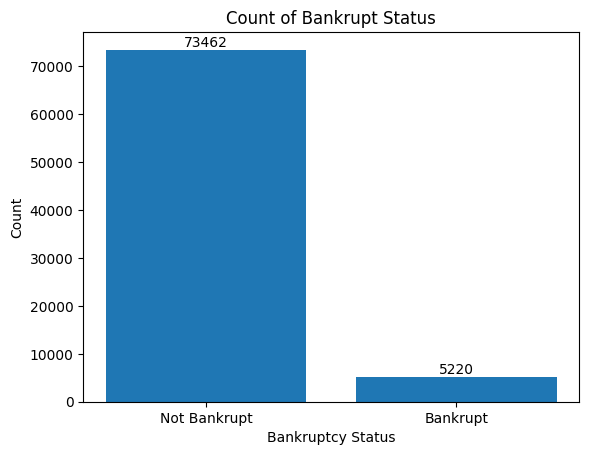

In [89]:
bars = plt.bar(bankrupt_counts.index, bankrupt_counts.values, tick_label=['Not Bankrupt', 'Bankrupt'])

# Annotate the bars with their counts
plt.bar_label(bars, labels=bankrupt_counts.values)

plt.xlabel('Bankruptcy Status')
plt.ylabel('Count')
plt.title('Count of Bankrupt Status')
plt.show()
